In [1]:
import os
import pandas as pd

#set up strings
carnum = 'carnum'
start = 'start'
end = 'end'
columns = [
    carnum,
    start,
    end,
    'distance',
    'gas'
]
mileage = 'mileage'
triptime = 'time'
speed = 'speed'

In [2]:
#read file into dataframe
df = pd.read_csv('cardata.csv',names=columns,parse_dates=['start','end'])
df

carnum               start                 end    distance        gas
0        73 2023-11-30 04:57:52 2023-11-30 05:48:15   98.863620   4.842427
1        73 2023-11-30 05:00:25 2023-11-30 06:48:40   60.952214  10.008699
2        73 2023-11-30 11:58:03 2023-11-30 12:21:11   44.861855   6.668674
3        73 2023-11-30 19:55:54 2023-11-30 22:37:06   26.679683   5.725053
4        73 2023-11-30 10:55:57 2023-11-30 13:03:49   56.449703   3.550615
..      ...                 ...                 ...         ...        ...
680      56 2023-11-30 05:41:40 2023-11-30 06:52:23   29.205601   8.796899
681      56 2023-11-30 00:34:24 2023-11-30 02:53:00   62.360221   5.515841
682      56 2023-11-30 19:02:12 2023-11-30 20:34:31  111.759254   8.484224
683      56 2023-11-30 02:01:12 2023-11-30 02:41:58   45.395829   6.123383
684      56 2023-11-30 07:17:09 2023-11-30 07:48:40   20.969945   7.003565

[685 rows x 5 columns]

In [3]:
#compute trip times
df[triptime] = df.end - df.start
df

carnum               start                 end    distance        gas  \
0        73 2023-11-30 04:57:52 2023-11-30 05:48:15   98.863620   4.842427   
1        73 2023-11-30 05:00:25 2023-11-30 06:48:40   60.952214  10.008699   
2        73 2023-11-30 11:58:03 2023-11-30 12:21:11   44.861855   6.668674   
3        73 2023-11-30 19:55:54 2023-11-30 22:37:06   26.679683   5.725053   
4        73 2023-11-30 10:55:57 2023-11-30 13:03:49   56.449703   3.550615   
..      ...                 ...                 ...         ...        ...   
680      56 2023-11-30 05:41:40 2023-11-30 06:52:23   29.205601   8.796899   
681      56 2023-11-30 00:34:24 2023-11-30 02:53:00   62.360221   5.515841   
682      56 2023-11-30 19:02:12 2023-11-30 20:34:31  111.759254   8.484224   
683      56 2023-11-30 02:01:12 2023-11-30 02:41:58   45.395829   6.123383   
684      56 2023-11-30 07:17:09 2023-11-30 07:48:40   20.969945   7.003565   

               time  
0   0 days 00:50:23  
1   0 days 01:48:15  
2   0 days 00:23:08  
3   0 days 02:41:12  
4   0 days 02:07:52  
..              ...  
680 0 days 01:10:43  
681 0 days 02:18:36  
682 0 days 01:32:19  
683 0 days 00:40:46  
684 0 days 00:31:31  

[685 rows x 6 columns]

In [4]:
#get rid of start and end - no longer needed
df.drop(columns=[start,end],inplace=True)
df

carnum    distance        gas            time
0        73   98.863620   4.842427 0 days 00:50:23
1        73   60.952214  10.008699 0 days 01:48:15
2        73   44.861855   6.668674 0 days 00:23:08
3        73   26.679683   5.725053 0 days 02:41:12
4        73   56.449703   3.550615 0 days 02:07:52
..      ...         ...        ...             ...
680      56   29.205601   8.796899 0 days 01:10:43
681      56   62.360221   5.515841 0 days 02:18:36
682      56  111.759254   8.484224 0 days 01:32:19
683      56   45.395829   6.123383 0 days 00:40:46
684      56   20.969945   7.003565 0 days 00:31:31

[685 rows x 4 columns]

In [5]:
#get totals by car
tots = df.groupby(carnum).sum(numeric_only=False) # need numeric_only=False so the time column is included
tots

distance         gas            time
carnum                                         
1        693.396753   78.110310 0 days 12:52:05
2        981.044936  100.654307 0 days 18:20:12
3        456.638354   46.209141 0 days 08:14:21
4        392.063016   44.488116 0 days 10:02:49
5        777.309219   94.453047 0 days 19:19:18
...             ...         ...             ...
93       577.798733   75.810127 0 days 16:47:56
94      1172.460418  107.900125 1 days 02:12:58
97      1581.524745  130.386475 1 days 05:07:45
98      1086.025420  121.220634 0 days 13:33:35
99       394.130102   35.015068 0 days 09:46:12

[64 rows x 3 columns]

In [6]:
#compute mileage and speed
tots[mileage] = tots.distance / tots.gas
tots[speed] = tots.distance / tots.time.dt.total_seconds() * 3600
tots.reset_index(inplace=True)
tots

carnum     distance         gas            time    mileage      speed
0        1   693.396753   78.110310 0 days 12:52:05   8.877148  53.885123
1        2   981.044936  100.654307 0 days 18:20:12   9.746676  53.501814
2        3   456.638354   46.209141 0 days 08:14:21   9.881992  55.422881
3        4   392.063016   44.488116 0 days 10:02:49   8.812758  39.023110
4        5   777.309219   94.453047 0 days 19:19:18   8.229583  40.229926
..     ...          ...         ...             ...        ...        ...
59      93   577.798733   75.810127 0 days 16:47:56   7.621656  34.395057
60      94  1172.460418  107.900125 1 days 02:12:58  10.866164  44.722896
61      97  1581.524745  130.386475 1 days 05:07:45  12.129515  54.293512
62      98  1086.025420  121.220634 0 days 13:33:35   8.959081  80.092011
63      99   394.130102   35.015068 0 days 09:46:12  11.256014  40.340850

[64 rows x 6 columns]

In [7]:
#show car with best mileage
tots[tots.mileage == tots.mileage.max()]

carnum    distance        gas            time    mileage       speed
16      26  554.406954  33.596612 0 days 04:06:56  16.501871  134.710113

In [8]:
#show car with the most trips
trips = df.groupby(carnum).count().reset_index()
trips

carnum  distance  gas  time
0        1         9    9     9
1        2        14   14    14
2        3         5    5     5
3        4         7    7     7
4        5        14   14    14
..     ...       ...  ...   ...
59      93        10   10    10
60      94        16   16    16
61      97        20   20    20
62      98        15   15    15
63      99         6    6     6

[64 rows x 4 columns]

In [9]:
trips[trips.distance == trips.distance.max()]

carnum  distance  gas  time
28      49        30   30    30

In [10]:
summary=tots[[carnum,speed,mileage]]
summary.to_excel('car_results.xlsx',index=False)


In [11]:
df

carnum    distance        gas            time
0        73   98.863620   4.842427 0 days 00:50:23
1        73   60.952214  10.008699 0 days 01:48:15
2        73   44.861855   6.668674 0 days 00:23:08
3        73   26.679683   5.725053 0 days 02:41:12
4        73   56.449703   3.550615 0 days 02:07:52
..      ...         ...        ...             ...
680      56   29.205601   8.796899 0 days 01:10:43
681      56   62.360221   5.515841 0 days 02:18:36
682      56  111.759254   8.484224 0 days 01:32:19
683      56   45.395829   6.123383 0 days 00:40:46
684      56   20.969945   7.003565 0 days 00:31:31

[685 rows x 4 columns]

In [12]:
tots

carnum     distance         gas            time    mileage      speed
0        1   693.396753   78.110310 0 days 12:52:05   8.877148  53.885123
1        2   981.044936  100.654307 0 days 18:20:12   9.746676  53.501814
2        3   456.638354   46.209141 0 days 08:14:21   9.881992  55.422881
3        4   392.063016   44.488116 0 days 10:02:49   8.812758  39.023110
4        5   777.309219   94.453047 0 days 19:19:18   8.229583  40.229926
..     ...          ...         ...             ...        ...        ...
59      93   577.798733   75.810127 0 days 16:47:56   7.621656  34.395057
60      94  1172.460418  107.900125 1 days 02:12:58  10.866164  44.722896
61      97  1581.524745  130.386475 1 days 05:07:45  12.129515  54.293512
62      98  1086.025420  121.220634 0 days 13:33:35   8.959081  80.092011
63      99   394.130102   35.015068 0 days 09:46:12  11.256014  40.340850

[64 rows x 6 columns]

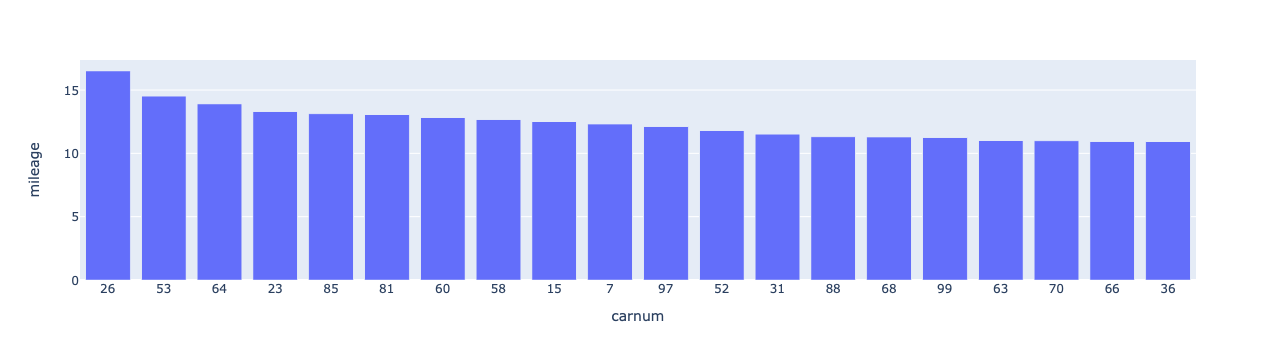

In [13]:
#Bar Chart comparing the mileage of the top 20 cars

top20=tots.sort_values('mileage',ascending=False)[:20]
top20['carnum'] = top20.carnum.astype('str') # needed since if x is numeric, it will use the number as the coordinates. and since car numbers aren't sequential, it leaves gaps
import plotly.express as px

barchart=px.bar(
    top20,
    x='carnum',
    y='mileage',
    
)
barchart

In [14]:
#Line Chart showing the distance of each trip for the car with the most trips
#first find the top car using the code from previous homework
topcar = trips[trips.distance == trips.distance.max()].iloc[0].loc['carnum']
topcar

49

In [15]:
#then filter the dataframe to just that car
topcartrips = df[df.carnum == topcar].reset_index(drop=True)
#add a column for index number
topcartrips['tripnum']=range(1,len(topcartrips)+1)
topcartrips

carnum    distance        gas            time  tripnum
0       49   73.038901   5.936401 0 days 00:41:55        1
1       49  113.594243   7.494983 0 days 01:09:43        2
2       49   67.118683   3.380064 0 days 01:28:33        3
3       49   97.336477   8.265427 0 days 01:05:52        4
4       49  115.749129  10.730161 0 days 01:38:15        5
5       49  119.827465   8.968032 0 days 01:14:23        6
6       49   48.981586   6.363823 0 days 00:14:04        7
7       49  106.544581  10.093181 0 days 00:20:06        8
8       49   62.657442   6.436208 0 days 00:38:31        9
9       49   24.743508  10.837144 0 days 02:06:25       10
10      49   45.936284   5.536147 0 days 01:05:14       11
11      49   53.073051  11.840764 0 days 02:13:08       12
12      49  100.895963   5.131839 0 days 00:39:26       13
13      49   47.806414   9.191788 0 days 00:33:22       14
14      49   63.430593   6.948979 0 days 02:31:19       15
15      49   36.772883   2.881928 0 days 00:41:05       16
16      49   99.732943   7.899830 0 days 01:34:19       17
17      49   57.831400  10.188595 0 days 01:49:53       18
18      49   95.012219  10.723983 0 days 02:44:46       19
19      49   64.524515  11.154344 0 days 01:05:41       20
20      49   63.631797  11.311414 0 days 01:11:59       21
21      49   24.081615   4.199120 0 days 01:57:29       22
22      49   54.060546   6.982471 0 days 00:13:23       23
23      49   48.817311   2.147715 0 days 01:55:38       24
24      49   52.769714   6.924048 0 days 01:44:44       25
25      49   62.129302   4.463484 0 days 00:49:08       26
26      49   74.845172  11.649483 0 days 01:33:06       27
27      49  100.382453   7.505712 0 days 00:43:52       28
28      49   69.610434   2.315390 0 days 00:36:54       29
29      49   94.818702   8.741902 0 days 02:22:16       30

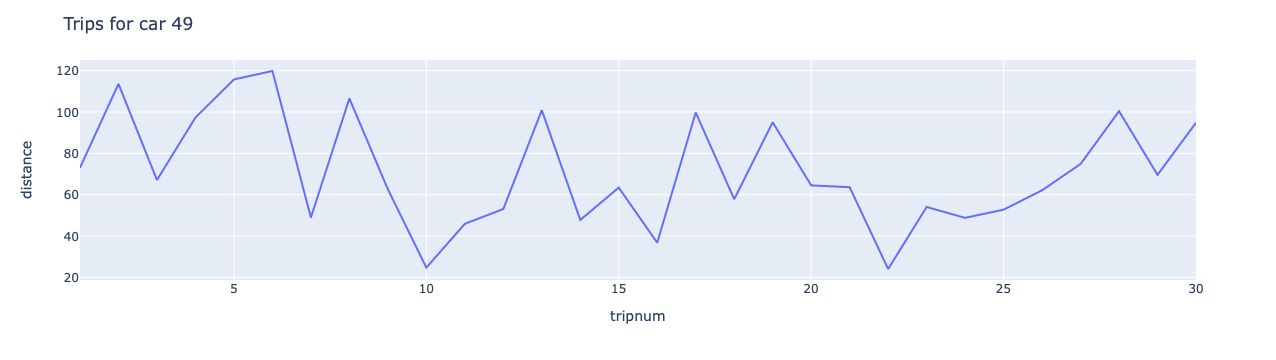

In [16]:
# finally draw the chart
linechart=px.line(
    topcartrips,
    x='tripnum',
    y='distance'
)
linechart.update_layout(title=f'Trips for car {topcar}')

In [17]:
from dash import Dash,dcc,html,dash_table as dt

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Gas Mileage Analysis"),
    html.Div([
        dcc.Graph(figure=barchart)
    ],
    style = {
        'display':'inline-block',
        'width':'50%'
    }),
    html.Div([
        dcc.Graph(figure=linechart)
    ],
    style = {
        'display':'inline-block',
        'width':'50%'
    }),
    html.Div([
        dt.DataTable(
            data = summary.to_dict('records'),
            columns = [{'name':c,'id':c} for c in summary.columns]
        )
    ],
    style = {
        'display':'inline-block',
        'width':'100%'
    })
])

# Run app and display result in tab
app.run_server(jupyter_mode='jupyterlab')